#Hackathon - Big_Mart_Sales

In [447]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.neighbors import KNeighborsClassifier
import seaborn as sns
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
from xgboost.sklearn import XGBRegressor
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.linear_model import LinearRegression
from sklearn.naive_bayes import GaussianNB
from lightgbm import LGBMRegressor
from sklearn.linear_model import ElasticNet
from sklearn.linear_model import Ridge
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedKFold
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from xgboost import XGBClassifier
from sklearn.linear_model import Lasso
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import uniform
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import GradientBoostingRegressor
from math import sqrt
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestRegressor
from sklearn import svm
from scipy import stats
from sklearn.linear_model import SGDRegressor
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import precision_score, recall_score,confusion_matrix,accuracy_score,f1_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.linear_model import RidgeClassifier
from xgboost import XGBClassifier
from sklearn.metrics import make_scorer

In [448]:
df_test_data=pd.read_csv('test_AbJTz2l.csv')
df_train_data=pd.read_csv('train_v9rqX0R.csv')
df_train_data2=df_train_data.copy()#creating a copy of the data
df_test_data2=df_test_data.copy()#creating a copy of the data
df_train_data.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [449]:
print(df_train_data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB
None


There are 2 columns with missing data

In [450]:
print(df_train_data.nunique(),'\n',df_test_data.nunique())

Item_Identifier              1559
Item_Weight                   415
Item_Fat_Content                5
Item_Visibility              7880
Item_Type                      16
Item_MRP                     5938
Outlet_Identifier              10
Outlet_Establishment_Year       9
Outlet_Size                     3
Outlet_Location_Type            3
Outlet_Type                     4
Item_Outlet_Sales            3493
dtype: int64 
 Item_Identifier              1543
Item_Weight                   410
Item_Fat_Content                5
Item_Visibility              5277
Item_Type                      16
Item_MRP                     4402
Outlet_Identifier              10
Outlet_Establishment_Year       9
Outlet_Size                     3
Outlet_Location_Type            3
Outlet_Type                     4
dtype: int64


From the aobve we can notice that Item_identifier is not completely a Unique ID column , hence we can not drop this column. We will have to encode it

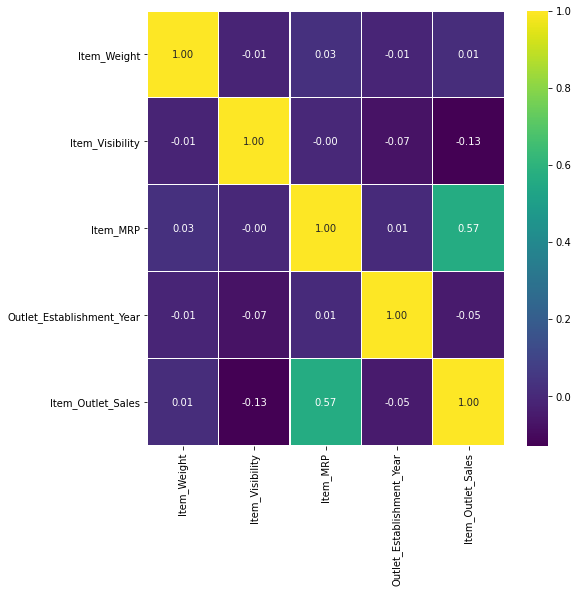

In [451]:
plt.figure(figsize=(8,8))
sns.heatmap(df_train_data.corr(),cmap='viridis',annot=True,linewidths=0.2,fmt='.2f')
plt.show()

1) Item_Mrp and Item_Outlet_Sales have moderate amount of Possitive Correlation depicting that Increase in MRP leads to Higher Sales
2)Rest of the columns do not depict much correlation and hence there is no multicolinearity

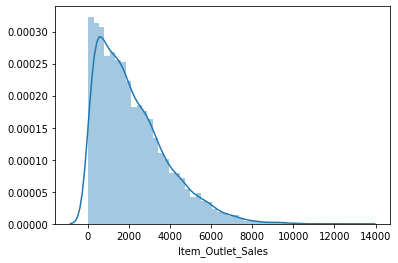

1.1775306028542798


In [452]:
sns.distplot(df_train_data['Item_Outlet_Sales'])
plt.show()
print(df_train_data['Item_Outlet_Sales'].skew())

The Target Column is Possitively Skewed Data. However the Skewness is not very high.

In [453]:
df_train_data_con = df_train_data.select_dtypes(include=np.number)
print('Continous Features are \n',df_train_data_con.columns,'\n')
df_train_data_cat=df_train_data.select_dtypes(exclude=np.number)
print('Categorical Features are \n',df_train_data_cat.columns)

Continous Features are 
 Index(['Item_Weight', 'Item_Visibility', 'Item_MRP',
       'Outlet_Establishment_Year', 'Item_Outlet_Sales'],
      dtype='object') 

Categorical Features are 
 Index(['Item_Identifier', 'Item_Fat_Content', 'Item_Type', 'Outlet_Identifier',
       'Outlet_Size', 'Outlet_Location_Type', 'Outlet_Type'],
      dtype='object')


There are 4 Continous Featuers other than the target column and 7 Categorical Features. 

In [454]:
df_train_data.reset_index(inplace=True)
sales_dict=dict(df_train_data[['index','Item_Outlet_Sales']].values)
df_test_data.reset_index(inplace=True)
item_iden_dict=dict(df_test_data[['index','Item_Identifier']].values)

The above two are created for Mapping purposes which would be done later during the code.

In [455]:
print(df_train_data.isna().sum())

index                           0
Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64


In [456]:
for i in ['Item_Fat_Content', 'Item_Type', 'Outlet_Identifier','Outlet_Size', 'Outlet_Location_Type', 'Outlet_Type']:
  print(i,'\n',df_train_data_cat[i].unique())

Item_Fat_Content 
 ['Low Fat' 'Regular' 'low fat' 'LF' 'reg']
Item_Type 
 ['Dairy' 'Soft Drinks' 'Meat' 'Fruits and Vegetables' 'Household'
 'Baking Goods' 'Snack Foods' 'Frozen Foods' 'Breakfast'
 'Health and Hygiene' 'Hard Drinks' 'Canned' 'Breads' 'Starchy Foods'
 'Others' 'Seafood']
Outlet_Identifier 
 ['OUT049' 'OUT018' 'OUT010' 'OUT013' 'OUT027' 'OUT045' 'OUT017' 'OUT046'
 'OUT035' 'OUT019']
Outlet_Size 
 ['Medium' nan 'High' 'Small']
Outlet_Location_Type 
 ['Tier 1' 'Tier 3' 'Tier 2']
Outlet_Type 
 ['Supermarket Type1' 'Supermarket Type2' 'Grocery Store'
 'Supermarket Type3']


From above 2 codes we can notice that-
- Column 'Item_Fat_content has values such as 'low fat', 'LF' which is nothing but 'Low Fat' only and similarly it has 'reg' which is 'Regular'.
- The company has 10 outlets of 3 different sizes which are located in 3 different types of cities.
- There are 4 different types of stores
- There are NA values which have to be treated

In [457]:
df_train_data['Item_Fat_Content'].replace(['LF','low fat','reg'],['Low Fat','Low Fat','Regular'],inplace=True)
df_train_data['Item_Fat_Content'].value_counts()#Filling the basic typing errors for the train and test data

Low Fat    5517
Regular    3006
Name: Item_Fat_Content, dtype: int64

In [458]:
df_test_data['Item_Fat_Content'].replace(['LF','low fat','reg'],['Low Fat','Low Fat','Regular'],inplace=True)
df_test_data['Item_Fat_Content'].value_counts()

Low Fat    3668
Regular    2013
Name: Item_Fat_Content, dtype: int64

#Exploratory Data Analysis

Item_Weight


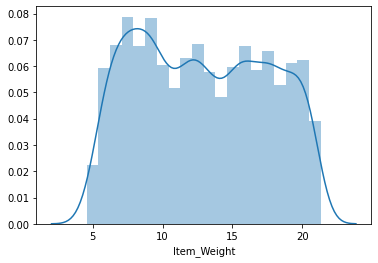

Skewness for Item_Weight  is  0.0824262091221237
Item_Visibility


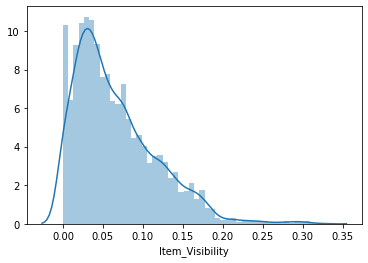

Skewness for Item_Visibility  is  1.1670905496918407
Item_MRP


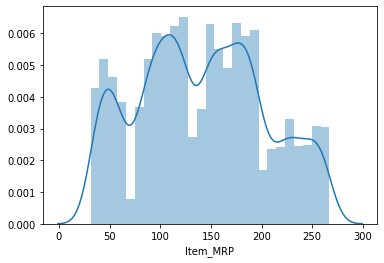

Skewness for Item_MRP  is  0.1272022683110526
Outlet_Establishment_Year


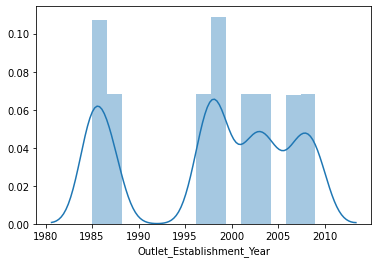

Skewness for Outlet_Establishment_Year  is  -0.39664078591550556
Item_Outlet_Sales


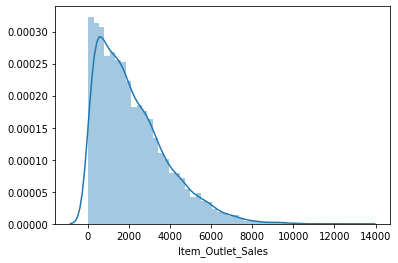

Skewness for Item_Outlet_Sales  is  1.1775306028542798


In [459]:
for i in df_train_data_con.columns:
  print(i)
  sns.distplot(df_train_data_con[i])
  plt.show()
  print('Skewness for',i,' is ',df_train_data_con[i].skew())

- Data contains only possitively skewed data and no Negatively skewed data. No column is highly skewed.
- Outlet_Establishment_Year feature is not a continous feature.

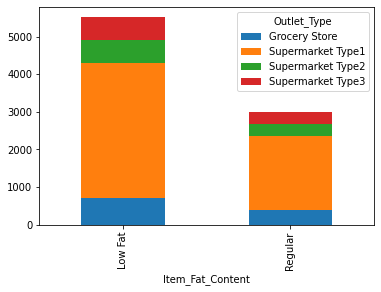

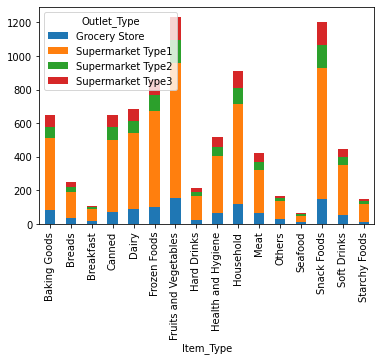

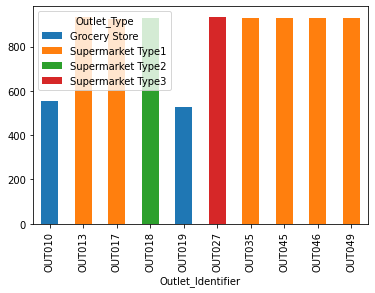

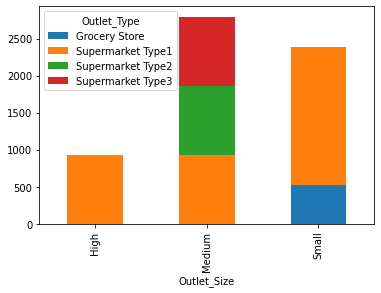

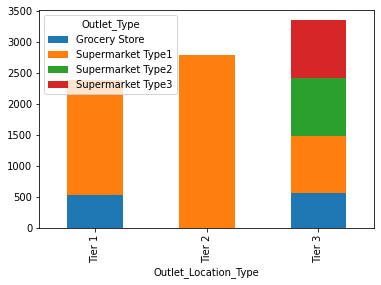

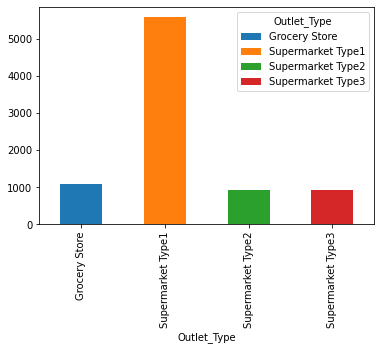

In [460]:
df_train_data_con = df_train_data.select_dtypes(include=np.number)
df_train_data_cat=df_train_data.select_dtypes(exclude=np.number)
for i in ['Item_Fat_Content', 'Item_Type', 'Outlet_Identifier','Outlet_Size', 'Outlet_Location_Type', 'Outlet_Type']:
  df_train_data_cat.groupby(i)['Outlet_Type'].value_counts().unstack().plot(kind='bar',stacked=True)

From the above-
- Majority of the data is of Supermarket Type_1.
- Tier 2 cities do not have any other type of stores other than Supermarket Type 1.
- The size of the stores follow ordinal order ie Size of Supermarket_Type_1> Supermarket_Type_2 > Supermarket_Type_3 > Grocery_Store
- Highest selling products are the Fruits/Vegetables and Snack Food . Lowest Selling product is Sea Food
- More 'Low Fat' items are sold than 'Regular Fat' Food 

#Data Preprocessing

In [461]:
df_train_data_notnull=df_train_data[['Item_Identifier','Item_Weight']][~df_train_data['Item_Weight'].isnull()]
mapping = dict(df_train_data_notnull[['Item_Identifier','Item_Weight']].values)
df_train_data['Item_Weight'] = df_train_data['Item_Identifier'].map(mapping)
df_train_data['Item_Weight'].isnull().sum()

4

From further analysis of Item_Weight it was noticed that for some items weights were mentioned for a perticular store but for the same itmes weights were not mentioned at another store. It is logical to take the weights as same for those items and hence the above code helps in achieving it. Post that there were only 4 missing rows of item weights.  

In [462]:
df_test_data_notnull=df_test_data[['Item_Identifier','Item_Weight']][~df_test_data['Item_Weight'].isnull()]
mapping = dict(df_test_data_notnull[['Item_Identifier','Item_Weight']].values)
df_test_data['Item_Weight'] = df_test_data['Item_Identifier'].map(mapping)
df_test_data['Item_Weight'].isnull().sum()


20

In [463]:
a=df_train_data['Item_Weight'].median()
a

12.65

We have filled the remaining 4 rows with median value.

In [464]:
df_train_data['Item_Weight'].fillna(a,inplace=True)
df_train_data['Item_Weight'].isnull().sum()

0

In [465]:
df_test_data['Item_Weight'].fillna(a,inplace=True)
df_test_data['Item_Weight'].isnull().sum()

0

In [466]:
#Determine average visibility of a product
visibility_avg = df_train_data.pivot_table(values='Item_Visibility', index='Item_Identifier')
miss_bool = (df_train_data['Item_Visibility'] == 0)
print('Number of 0 values initially: %d'%sum(miss_bool))

Number of 0 values initially: 526


In [467]:
#Determine average visibility of a product
test_visibility_avg = df_test_data.pivot_table(values='Item_Visibility', index='Item_Identifier')
test_miss_bool = (df_test_data['Item_Visibility'] == 0)
print('Number of 0 values initially: %d'%sum(test_miss_bool))

Number of 0 values initially: 353


There are many products with item visibility stated as 0 . This is not possible and thus for practical purposes average visiblity of that product is taken to subsitute it.

In [468]:
df_train_data['Item_Visibility'] = df_train_data['Item_Visibility'].replace(0,(df_train_data.groupby('Item_Identifier')['Item_Visibility'].transform('mean')))
df_test_data['Item_Visibility'] = df_test_data['Item_Visibility'].replace(0,(df_train_data.groupby('Item_Identifier')['Item_Visibility'].transform('mean')))

In [469]:
le = LabelEncoder()
df_train_data['Item_Identifier'] = le.fit_transform(df_train_data['Item_Identifier'].values)
df_train_data['Item_Identifier'].nunique()

1559

Note- We can not use One Hot Encoding for this coloumn as there are different numbers in the train and test file. This would result in creating extra columns in the train file and due to this we will not be able to apply Models. Thus we have used Label Encoder here.

In [470]:
df_test_data['Item_Identifier'] = le.transform(df_test_data['Item_Identifier'].values)
df_test_data['Item_Identifier'].nunique()

1543

In [471]:
df_test_data.head()

,index,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,0,1114,20.750,Low Fat,0.007565,Snack Foods,107.8622,OUT049,1999,Medium,Tier 1,Supermarket Type1
1,1,1078,8.300,Regular,0.038428,Dairy,87.3198,OUT017,2007,NaN,Tier 2,Supermarket Type1
2,2,1420,14.600,Low Fat,0.099575,Others,241.7538,OUT010,1998,NaN,Tier 3,Grocery Store
3,3,817,7.315,Low Fat,0.015388,Snack Foods,155.0340,OUT017,2007,NaN,Tier 2,Supermarket Type1
4,4,1197,13.600,Regular,0.118599,Dairy,234.2300,OUT027,1985,Medium,Tier 3,Supermarket Type3


In [472]:
df_train_data['Outlet_Size'].replace(['High','Medium','Small'],[2,1,0],inplace=True)# Since it is categorical and ordinal feature we have not done One Hot Encoding here

In [473]:
df_test_data['Outlet_Size'].replace(['High','Medium','Small'],[2,1,0],inplace=True)

In [474]:
cat_cols=['Item_Fat_Content','Item_Type','Outlet_Identifier','Outlet_Location_Type','Outlet_Type']
for i in cat_cols:
  X_Dummy=pd.get_dummies(df_train_data[i],prefix=i)#XGBoost required that all columns are unique so that is why when we do get dummies for One hot encoding then we have to use prefix in it
  df_train_data = pd.concat([df_train_data,X_Dummy], axis=1)
  df_train_data.drop([i],axis=1,inplace=True)
df_train_data.columns

Index(['index', 'Item_Identifier', 'Item_Weight', 'Item_Visibility',
       'Item_MRP', 'Outlet_Establishment_Year', 'Outlet_Size',
       'Item_Outlet_Sales', 'Item_Fat_Content_Low Fat',
       'Item_Fat_Content_Regular', 'Item_Type_Baking Goods',
       'Item_Type_Breads', 'Item_Type_Breakfast', 'Item_Type_Canned',
       'Item_Type_Dairy', 'Item_Type_Frozen Foods',
       'Item_Type_Fruits and Vegetables', 'Item_Type_Hard Drinks',
       'Item_Type_Health and Hygiene', 'Item_Type_Household', 'Item_Type_Meat',
       'Item_Type_Others', 'Item_Type_Seafood', 'Item_Type_Snack Foods',
       'Item_Type_Soft Drinks', 'Item_Type_Starchy Foods',
       'Outlet_Identifier_OUT010', 'Outlet_Identifier_OUT013',
       'Outlet_Identifier_OUT017', 'Outlet_Identifier_OUT018',
       'Outlet_Identifier_OUT019', 'Outlet_Identifier_OUT027',
       'Outlet_Identifier_OUT035', 'Outlet_Identifier_OUT045',
       'Outlet_Identifier_OUT046', 'Outlet_Identifier_OUT049',
       'Outlet_Location_Type_Tier 1

In [475]:
cat_cols=['Item_Fat_Content','Item_Type','Outlet_Identifier','Outlet_Location_Type','Outlet_Type']
for i in cat_cols:
  X_Dummy=pd.get_dummies(df_test_data[i],prefix=i)#XGBoost required that all columns are unique so that is why when we do get dummies for One hot encoding then we have to use prefix in it
  df_test_data = pd.concat([df_test_data,X_Dummy], axis=1)
  df_test_data.drop([i],axis=1,inplace=True)
df_test_data.columns

Index(['index', 'Item_Identifier', 'Item_Weight', 'Item_Visibility',
       'Item_MRP', 'Outlet_Establishment_Year', 'Outlet_Size',
       'Item_Fat_Content_Low Fat', 'Item_Fat_Content_Regular',
       'Item_Type_Baking Goods', 'Item_Type_Breads', 'Item_Type_Breakfast',
       'Item_Type_Canned', 'Item_Type_Dairy', 'Item_Type_Frozen Foods',
       'Item_Type_Fruits and Vegetables', 'Item_Type_Hard Drinks',
       'Item_Type_Health and Hygiene', 'Item_Type_Household', 'Item_Type_Meat',
       'Item_Type_Others', 'Item_Type_Seafood', 'Item_Type_Snack Foods',
       'Item_Type_Soft Drinks', 'Item_Type_Starchy Foods',
       'Outlet_Identifier_OUT010', 'Outlet_Identifier_OUT013',
       'Outlet_Identifier_OUT017', 'Outlet_Identifier_OUT018',
       'Outlet_Identifier_OUT019', 'Outlet_Identifier_OUT027',
       'Outlet_Identifier_OUT035', 'Outlet_Identifier_OUT045',
       'Outlet_Identifier_OUT046', 'Outlet_Identifier_OUT049',
       'Outlet_Location_Type_Tier 1', 'Outlet_Location_Type_Tie

Using One hot encoding on the rest of the categorical data

In [476]:
print(df_train_data.shape)# Also contains target feature of Outlet_sales
print(df_test_data.shape)

(8523, 43)
(5681, 42)


The above was required to see if there is no mis-match in both their shapes as our model would not work with different shape.

In [477]:
from sklearn.preprocessing import RobustScaler 
scaler = RobustScaler()

df_train_data[['Item_Visibility','Item_MRP']] = scaler.fit_transform(df_train_data[['Item_Visibility','Item_MRP']])
df_train_data.describe()

,index,Item_Identifier,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Outlet_Size,Item_Outlet_Sales,Item_Fat_Content_Low Fat,Item_Fat_Content_Regular,Item_Type_Baking Goods,Item_Type_Breads,Item_Type_Breakfast,Item_Type_Canned,Item_Type_Dairy,Item_Type_Frozen Foods,Item_Type_Fruits and Vegetables,Item_Type_Hard Drinks,Item_Type_Health and Hygiene,Item_Type_Household,Item_Type_Meat,Item_Type_Others,Item_Type_Seafood,Item_Type_Snack Foods,Item_Type_Soft Drinks,Item_Type_Starchy Foods,Outlet_Identifier_OUT010,Outlet_Identifier_OUT013,Outlet_Identifier_OUT017,Outlet_Identifier_OUT018,Outlet_Identifier_OUT019,Outlet_Identifier_OUT027,Outlet_Identifier_OUT035,Outlet_Identifier_OUT045,Outlet_Identifier_OUT046,Outlet_Identifier_OUT049,Outlet_Location_Type_Tier 1,Outlet_Location_Type_Tier 2,Outlet_Location_Type_Tier 3,Outlet_Type_Grocery Store,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3
count,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000,6113.000000,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,4261.000000,779.714889,12.875314,0.193018,-0.022000,1997.831867,0.761819,2181.288914,0.647307,0.352693,0.076030,0.029450,0.012906,0.076147,0.080019,0.100434,0.144550,0.025109,0.061011,0.106770,0.049865,0.019829,0.007509,0.140795,0.052212,0.017365,0.065118,0.109351,0.108647,0.108882,0.061950,0.109703,0.109117,0.108999,0.109117,0.109117,0.280183,0.326763,0.393054,0.127068,0.654347,0.108882,0.109703
std,2460.522505,449.222377,4.645010,0.754171,0.678251,8.371760,0.697463,1706.499616,0.477836,0.477836,0.265061,0.169073,0.112877,0.265249,0.271338,0.300596,0.351667,0.156464,0.239365,0.308839,0.217679,0.139420,0.086334,0.347831,0.222467,0.130634,0.246748,0.312098,0.311214,0.311509,0.241079,0.312538,0.311804,0.311656,0.311804,0.311804,0.449115,0.469057,0.488457,0.333069,0.475609,0.311509,0.312538
min,0.000000,0.000000,4.555000,-0.807727,-1.216796,1985.000000,0.000000,33.290000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2130.500000,395.500000,8.785000,-0.390750,-0.535698,1987.000000,0.000000,834.247400,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,4261.000000,783.000000,12.650000,0.000000,0.000000,1999.000000,1.000000,1794.331000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
75%,6391.500000,1167.000000,16.850000,0.609250,0.464302,2004.000000,1.000000,3101.296400,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000
max,8522.000000,1558.000000,21.350000,4.110299,1.349155,2009.000000,2.000000,13086.964800,1.000000,1.000000,1.0000

We have used RobustScaler as it helps in treating outliers, Alternatively we could also use Quantile Scaler

In [478]:
df_test_data[['Item_Visibility','Item_MRP']] = scaler.fit_transform(df_test_data[['Item_Visibility','Item_MRP']])
df_test_data.describe()

,index,Item_Identifier,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Outlet_Size,Item_Fat_Content_Low Fat,Item_Fat_Content_Regular,Item_Type_Baking Goods,Item_Type_Breads,Item_Type_Breakfast,Item_Type_Canned,Item_Type_Dairy,Item_Type_Frozen Foods,Item_Type_Fruits and Vegetables,Item_Type_Hard Drinks,Item_Type_Health and Hygiene,Item_Type_Household,Item_Type_Meat,Item_Type_Others,Item_Type_Seafood,Item_Type_Snack Foods,Item_Type_Soft Drinks,Item_Type_Starchy Foods,Outlet_Identifier_OUT010,Outlet_Identifier_OUT013,Outlet_Identifier_OUT017,Outlet_Identifier_OUT018,Outlet_Identifier_OUT019,Outlet_Identifier_OUT027,Outlet_Identifier_OUT035,Outlet_Identifier_OUT045,Outlet_Identifier_OUT046,Outlet_Identifier_OUT049,Outlet_Location_Type_Tier 1,Outlet_Location_Type_Tier 2,Outlet_Location_Type_Tier 3,Outlet_Type_Grocery Store,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3
count,5681.000000,5681.000000,5681.000000,5681.000000,5681.000000,5681.000000,4075.000000,5681.000000,5681.000000,5681.000000,5681.000000,5681.000000,5681.000000,5681.000000,5681.000000,5681.000000,5681.000000,5681.000000,5681.000000,5681.000000,5681.000000,5681.000000,5681.000000,5681.000000,5681.000000,5681.000000,5681.000000,5681.000000,5681.000000,5681.000000,5681.000000,5681.000000,5681.000000,5681.000000,5681.000000,5681.000000,5681.000000,5681.000000,5681.000000,5681.000000,5681.000000,5681.000000
mean,2840.000000,780.912515,12.675885,0.181712,-0.004280,1997.828903,0.761718,0.645661,0.354339,0.077099,0.029044,0.013378,0.076571,0.079916,0.100334,0.137476,0.026052,0.059497,0.112304,0.054744,0.019539,0.004401,0.138884,0.049463,0.021299,0.065129,0.109312,0.108608,0.108784,0.061961,0.109840,0.109136,0.108960,0.109136,0.109136,0.280232,0.326703,0.393065,0.127090,0.654286,0.108784,0.109840
std,1640.107771,450.253632,4.649352,0.754793,0.674664,8.372256,0.697430,0.478355,0.478355,0.266772,0.167945,0.114897,0.265933,0.271186,0.300472,0.344379,0.159303,0.236573,0.315768,0.227500,0.138421,0.066197,0.345856,0.216852,0.144392,0.246776,0.312057,0.311174,0.311395,0.241106,0.312718,0.311837,0.311616,0.311837,0.311837,0.449152,0.469049,0.488474,0.333103,0.475642,0.311395,0.312718
min,0.000000,0.000000,4.555000,-0.827072,-1.194410,1985.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1420.000000,384.000000,8.630000,-0.404644,-0.513056,1987.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,2840.000000,779.000000,12.350000,0.000000,0.000000,1999.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
75%,4260.000000,1173.000000,16.700000,0.595356,0.486944,2004.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000
max,5680.000000,1558.000000,21.350000,4.035506,1.366300,2009.000000,2.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1

Now there is column called Outlet_Size which has many missing values. We will now create a model to predict the missing values. Thus before applying our main model to predict sales we are applying a model to predict the missing values of a feature column.

In [479]:
#Applying initial model
df_train_data.drop(['Outlet_Establishment_Year','Item_Outlet_Sales'],axis=1,inplace=True)
X_train=df_train_data[df_train_data['Outlet_Size'].notna()]
X_train.drop(['Outlet_Size'],axis=1,inplace=True)
y_train=df_train_data['Outlet_Size'][df_train_data['Outlet_Size'].notna()]
X_test=df_train_data[df_train_data['Outlet_Size'].isnull()]
X_test.drop(['Outlet_Size'],axis=1,inplace=True)

/usr/local/lib/python3.6/dist-packages/pandas/core/frame.py:3997: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [480]:
df_test_data.drop(['Outlet_Establishment_Year'],axis=1,inplace=True)
X_test_train=df_test_data[df_test_data['Outlet_Size'].notna()]
X_test_test=df_test_data[df_test_data['Outlet_Size'].isnull()]
X_test_test.drop(['Outlet_Size'],axis=1,inplace=True)

/usr/local/lib/python3.6/dist-packages/pandas/core/frame.py:3997: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [481]:
copy_X_train=X_train.copy()
copy_X_test=X_test.copy()
copy_y_train=y_train.copy()

In [482]:
copy_X_test_train=X_test_train.copy()
copy_X_test_test=X_test_test.copy()

In [483]:
X_train.drop(['index'],axis=1,inplace=True)
X_test.drop(['index'],axis=1,inplace=True)

/usr/local/lib/python3.6/dist-packages/pandas/core/frame.py:3997: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [484]:
X_test_test.drop(['index'],axis=1,inplace=True)
X_test_train.drop(['index'],axis=1,inplace=True)

/usr/local/lib/python3.6/dist-packages/pandas/core/frame.py:3997: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [485]:
#Naive classifier
from sklearn.ensemble import StackingRegressor,StackingClassifier,VotingClassifier
from sklearn.pipeline import make_pipeline
from sklearn.naive_bayes import GaussianNB

clf1 = LogisticRegression(multi_class='multinomial', random_state=1)
clf2 = RandomForestClassifier(n_estimators=50, random_state=1)
clf3 = GaussianNB()
eclf1 = VotingClassifier(estimators=[('lr', clf1), ('rf', clf2), ('gnb', clf3)], voting='soft')
eclf1.fit(X_train, y_train)
X_test['Outlet_Size']=eclf1.predict(X_test)

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # This is added back by InteractiveShellApp.init_path()


In [486]:
X_test_test['Outlet_Size']=eclf1.predict(X_test_test)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [487]:
X_train['Outlet_Size']=y_train

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [488]:
X_train['index']=copy_X_train['index']
X_test['index']=copy_X_test['index']

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [489]:
X_test_train['index']=copy_X_test_train['index']
X_test_test['index']=copy_X_test_test['index']

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [490]:
for i in X_train['index'].unique():
  a=i in X_test['index'].unique()
  if a ==True:
    print('True value present')

In [491]:
print(X_test.isnull().sum())
print('------------------------')
print(X_test.shape)
print('=============')
print(X_train.isnull().sum())
print('------------------------')
print(X_train.shape)

Item_Identifier                    0
Item_Weight                        0
Item_Visibility                    0
Item_MRP                           0
Item_Fat_Content_Low Fat           0
Item_Fat_Content_Regular           0
Item_Type_Baking Goods             0
Item_Type_Breads                   0
Item_Type_Breakfast                0
Item_Type_Canned                   0
Item_Type_Dairy                    0
Item_Type_Frozen Foods             0
Item_Type_Fruits and Vegetables    0
Item_Type_Hard Drinks              0
Item_Type_Health and Hygiene       0
Item_Type_Household                0
Item_Type_Meat                     0
Item_Type_Others                   0
Item_Type_Seafood                  0
Item_Type_Snack Foods              0
Item_Type_Soft Drinks              0
Item_Type_Starchy Foods            0
Outlet_Identifier_OUT010           0
Outlet_Identifier_OUT013           0
Outlet_Identifier_OUT017           0
Outlet_Identifier_OUT018           0
Outlet_Identifier_OUT019           0
O

In [492]:
new_df_train_data = pd.concat([X_test,X_train], axis=0)

In [493]:
new_df_test_data = pd.concat([X_test_test,X_test_train], axis=0)

In [494]:
print(new_df_train_data.isnull().sum())
new_df_train_data.head()

Item_Identifier                    0
Item_Weight                        0
Item_Visibility                    0
Item_MRP                           0
Item_Fat_Content_Low Fat           0
Item_Fat_Content_Regular           0
Item_Type_Baking Goods             0
Item_Type_Breads                   0
Item_Type_Breakfast                0
Item_Type_Canned                   0
Item_Type_Dairy                    0
Item_Type_Frozen Foods             0
Item_Type_Fruits and Vegetables    0
Item_Type_Hard Drinks              0
Item_Type_Health and Hygiene       0
Item_Type_Household                0
Item_Type_Meat                     0
Item_Type_Others                   0
Item_Type_Seafood                  0
Item_Type_Snack Foods              0
Item_Type_Soft Drinks              0
Item_Type_Starchy Foods            0
Outlet_Identifier_OUT010           0
Outlet_Identifier_OUT013           0
Outlet_Identifier_OUT017           0
Outlet_Identifier_OUT018           0
Outlet_Identifier_OUT019           0
O

,Item_Identifier,Item_Weight,Item_Visibility,Item_MRP,Item_Fat_Content_Low Fat,Item_Fat_Content_Regular,Item_Type_Baking Goods,Item_Type_Breads,Item_Type_Breakfast,Item_Type_Canned,Item_Type_Dairy,Item_Type_Frozen Foods,Item_Type_Fruits and Vegetables,Item_Type_Hard Drinks,Item_Type_Health and Hygiene,Item_Type_Household,Item_Type_Meat,Item_Type_Others,Item_Type_Seafood,Item_Type_Snack Foods,Item_Type_Soft Drinks,Item_Type_Starchy Foods,Outlet_Identifier_OUT010,Outlet_Identifier_OUT013,Outlet_Identifier_OUT017,Outlet_Identifier_OUT018,Outlet_Identifier_OUT019,Outlet_Identifier_OUT027,Outlet_Identifier_OUT035,Outlet_Identifier_OUT045,Outlet_Identifier_OUT046,Outlet_Identifier_OUT049,Outlet_Location_Type_Tier 1,Outlet_Location_Type_Tier 2,Outlet_Location_Type_Tier 3,Outlet_Type_Grocery Store,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3,Outlet_Size,index
3,1121,19.200,-0.630593,0.425652,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,1.0,3
8,440,16.200,-0.609192,-0.501433,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0.0,8
9,990,19.200,0.568205,0.488020,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0.0,9
25,1294,13.000,0.650534,-1.057610,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0.0,25
28,350,5.925,1.582905,-1.061938,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0.0,28


In [495]:
print(new_df_test_data.isnull().sum())
new_df_test_data.head()

Item_Identifier                    0
Item_Weight                        0
Item_Visibility                    0
Item_MRP                           0
Item_Fat_Content_Low Fat           0
Item_Fat_Content_Regular           0
Item_Type_Baking Goods             0
Item_Type_Breads                   0
Item_Type_Breakfast                0
Item_Type_Canned                   0
Item_Type_Dairy                    0
Item_Type_Frozen Foods             0
Item_Type_Fruits and Vegetables    0
Item_Type_Hard Drinks              0
Item_Type_Health and Hygiene       0
Item_Type_Household                0
Item_Type_Meat                     0
Item_Type_Others                   0
Item_Type_Seafood                  0
Item_Type_Snack Foods              0
Item_Type_Soft Drinks              0
Item_Type_Starchy Foods            0
Outlet_Identifier_OUT010           0
Outlet_Identifier_OUT013           0
Outlet_Identifier_OUT017           0
Outlet_Identifier_OUT018           0
Outlet_Identifier_OUT019           0
O

,Item_Identifier,Item_Weight,Item_Visibility,Item_MRP,Item_Fat_Content_Low Fat,Item_Fat_Content_Regular,Item_Type_Baking Goods,Item_Type_Breads,Item_Type_Breakfast,Item_Type_Canned,Item_Type_Dairy,Item_Type_Frozen Foods,Item_Type_Fruits and Vegetables,Item_Type_Hard Drinks,Item_Type_Health and Hygiene,Item_Type_Household,Item_Type_Meat,Item_Type_Others,Item_Type_Seafood,Item_Type_Snack Foods,Item_Type_Soft Drinks,Item_Type_Starchy Foods,Outlet_Identifier_OUT010,Outlet_Identifier_OUT013,Outlet_Identifier_OUT017,Outlet_Identifier_OUT018,Outlet_Identifier_OUT019,Outlet_Identifier_OUT027,Outlet_Identifier_OUT035,Outlet_Identifier_OUT045,Outlet_Identifier_OUT046,Outlet_Identifier_OUT049,Outlet_Location_Type_Tier 1,Outlet_Location_Type_Tier 2,Outlet_Location_Type_Tier 3,Outlet_Type_Grocery Store,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3,Outlet_Size,index
1,1078,8.300,-0.297792,-0.590469,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0.0,1
2,1420,14.600,0.631242,1.095223,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0.0,2
3,817,7.315,-0.647836,0.148651,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0.0,3
8,674,6.305,0.992700,-0.498521,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0.0,8
9,172,5.985,-0.795059,0.496395,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0.0,9


In [496]:
# new_df_train_data.drop(['Item_Outlet_Sales'],axis=1,inplace=True)

In [497]:
new_df_test_data.drop(['Item_Identifier'],axis=1,inplace=True)

In [498]:
new_df_train_data['Item_Outlet_Sales']=new_df_train_data['index'].map(sales_dict)

In [499]:
new_df_test_data['Item_Identifier']=new_df_test_data['index'].map(item_iden_dict)

In [500]:
new_df_train_data.head()

,Item_Identifier,Item_Weight,Item_Visibility,Item_MRP,Item_Fat_Content_Low Fat,Item_Fat_Content_Regular,Item_Type_Baking Goods,Item_Type_Breads,Item_Type_Breakfast,Item_Type_Canned,Item_Type_Dairy,Item_Type_Frozen Foods,Item_Type_Fruits and Vegetables,Item_Type_Hard Drinks,Item_Type_Health and Hygiene,Item_Type_Household,Item_Type_Meat,Item_Type_Others,Item_Type_Seafood,Item_Type_Snack Foods,Item_Type_Soft Drinks,Item_Type_Starchy Foods,Outlet_Identifier_OUT010,Outlet_Identifier_OUT013,Outlet_Identifier_OUT017,Outlet_Identifier_OUT018,Outlet_Identifier_OUT019,Outlet_Identifier_OUT027,Outlet_Identifier_OUT035,Outlet_Identifier_OUT045,Outlet_Identifier_OUT046,Outlet_Identifier_OUT049,Outlet_Location_Type_Tier 1,Outlet_Location_Type_Tier 2,Outlet_Location_Type_Tier 3,Outlet_Type_Grocery Store,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3,Outlet_Size,index,Item_Outlet_Sales
3,1121,19.200,-0.630593,0.425652,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,1.0,3,732.3800
8,440,16.200,-0.609192,-0.501433,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0.0,8,1076.5986
9,990,19.200,0.568205,0.488020,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0.0,9,4710.5350
25,1294,13.000,0.650534,-1.057610,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0.0,25,838.9080
28,350,5.925,1.582905,-1.061938,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0.0,28,178.4344


In [501]:
new_df_test_data.shape

(5681, 41)

In [502]:
new_df_train_data.drop(['index'],axis=1,inplace=True)

In [503]:
new_df_test_data.drop(['index'],axis=1,inplace=True)

In [504]:
# !pip install pycaret
# from pycaret.utils import enable_colab
# enable_colab()
# from pycaret.regression import *
# exp_clf101 = setup(data = new_df_train_data, target ='Item_Outlet_Sales', session_id=123) 
# compare_models()

In [505]:
print(new_df_train_data.columns)
print(new_df_train_data.shape)
print(new_df_test_data.columns)#1 column difference is ['Item_Outlet_Sales'] which we are going to drop it later for X_train and y_train 
print(new_df_test_data.shape)

Index(['Item_Identifier', 'Item_Weight', 'Item_Visibility', 'Item_MRP',
       'Item_Fat_Content_Low Fat', 'Item_Fat_Content_Regular',
       'Item_Type_Baking Goods', 'Item_Type_Breads', 'Item_Type_Breakfast',
       'Item_Type_Canned', 'Item_Type_Dairy', 'Item_Type_Frozen Foods',
       'Item_Type_Fruits and Vegetables', 'Item_Type_Hard Drinks',
       'Item_Type_Health and Hygiene', 'Item_Type_Household', 'Item_Type_Meat',
       'Item_Type_Others', 'Item_Type_Seafood', 'Item_Type_Snack Foods',
       'Item_Type_Soft Drinks', 'Item_Type_Starchy Foods',
       'Outlet_Identifier_OUT010', 'Outlet_Identifier_OUT013',
       'Outlet_Identifier_OUT017', 'Outlet_Identifier_OUT018',
       'Outlet_Identifier_OUT019', 'Outlet_Identifier_OUT027',
       'Outlet_Identifier_OUT035', 'Outlet_Identifier_OUT045',
       'Outlet_Identifier_OUT046', 'Outlet_Identifier_OUT049',
       'Outlet_Location_Type_Tier 1', 'Outlet_Location_Type_Tier 2',
       'Outlet_Location_Type_Tier 3', 'Outlet_Type_Gro

In [506]:
new_df_train_data.describe()

,Item_Identifier,Item_Weight,Item_Visibility,Item_MRP,Item_Fat_Content_Low Fat,Item_Fat_Content_Regular,Item_Type_Baking Goods,Item_Type_Breads,Item_Type_Breakfast,Item_Type_Canned,Item_Type_Dairy,Item_Type_Frozen Foods,Item_Type_Fruits and Vegetables,Item_Type_Hard Drinks,Item_Type_Health and Hygiene,Item_Type_Household,Item_Type_Meat,Item_Type_Others,Item_Type_Seafood,Item_Type_Snack Foods,Item_Type_Soft Drinks,Item_Type_Starchy Foods,Outlet_Identifier_OUT010,Outlet_Identifier_OUT013,Outlet_Identifier_OUT017,Outlet_Identifier_OUT018,Outlet_Identifier_OUT019,Outlet_Identifier_OUT027,Outlet_Identifier_OUT035,Outlet_Identifier_OUT045,Outlet_Identifier_OUT046,Outlet_Identifier_OUT049,Outlet_Location_Type_Tier 1,Outlet_Location_Type_Tier 2,Outlet_Location_Type_Tier 3,Outlet_Type_Grocery Store,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3,Outlet_Size,Item_Outlet_Sales
count,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,779.714889,12.875314,0.193018,-0.022000,0.647307,0.352693,0.076030,0.029450,0.012906,0.076147,0.080019,0.100434,0.144550,0.025109,0.061011,0.106770,0.049865,0.019829,0.007509,0.140795,0.052212,0.017365,0.065118,0.109351,0.108647,0.108882,0.061950,0.109703,0.109117,0.108999,0.109117,0.109117,0.280183,0.326763,0.393054,0.127068,0.654347,0.108882,0.109703,0.599202,2181.288914
std,449.222377,4.645010,0.754171,0.678251,0.477836,0.477836,0.265061,0.169073,0.112877,0.265249,0.271338,0.300596,0.351667,0.156464,0.239365,0.308839,0.217679,0.139420,0.086334,0.347831,0.222467,0.130634,0.246748,0.312098,0.311214,0.311509,0.241079,0.312538,0.311804,0.311656,0.311804,0.311804,0.449115,0.469057,0.488457,0.333069,0.475609,0.311509,0.312538,0.677433,1706.499616
min,0.000000,4.555000,-0.807727,-1.216796,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,33.290000
25%,395.500000,8.785000,-0.390750,-0.535698,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,834.247400
50%,783.000000,12.650000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1794.331000
75%,1167.000000,16.850000,0.609250,0.464302,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,1.000000,3101.296400
max,1558.000000,21.350000,4.110299,1.349155,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.0

In [507]:
X=new_df_train_data.drop(['Item_Outlet_Sales'],axis=1)
y=new_df_train_data['Item_Outlet_Sales']

In [508]:
#Redoing index for final model running
new_df_test_data.reset_index(inplace=True)#+1 column
item_iden_dict=dict(new_df_test_data[['index','Item_Identifier']].values)
new_df_test_data['Item_Identifier'] = le.fit_transform(new_df_test_data['Item_Identifier'].values)
copy_new_df_test_data=new_df_test_data.copy()
new_df_test_data.drop(['index'],axis=1,inplace=True)#-1 column

In [509]:
new_df_test_data.shape

(5681, 40)

#Applying the Final Model

In [510]:
#GBRegression 
X_train, X_test, y_train, y_test= train_test_split(X,y,test_size=0.3, random_state=0) 

#Gradient Boosting Regressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.inspection import permutation_importance
gbr = GradientBoostingRegressor(n_estimators=1000, learning_rate=0.01, loss='ls', random_state=0)
gbr.fit(X_train, y_train)

rmse = sqrt(mean_squared_error(y_test, gbr.predict(X_test)))
print("The root mean squared error (RMSE) on test set: {:.4f}".format(rmse))

The root mean squared error (RMSE) on test set: 1089.0351


In [511]:
#Extreme GB
X_train, X_test, y_train, y_test= train_test_split(X,y,test_size=0.3, random_state=0)
from xgboost.sklearn import XGBRegressor
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedKFold
xgb_model = XGBRegressor()
xgb_model.fit(X_train, y_train)
rmse = sqrt(mean_squared_error(y_test, xgb_model.predict(X_test)))
print("The root mean squared error (RMSE) on test set: {:.4f}".format(rmse))

[16:38:43] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
The root mean squared error (RMSE) on test set: 1089.5431


In [512]:
#Light GB
X_train, X_test, y_train, y_test= train_test_split(X,y,test_size=0.3, random_state=0)
from lightgbm import LGBMRegressor
LGBmodel = LGBMRegressor()
LGBmodel.fit(X_train, y_train)
rmse = sqrt(mean_squared_error(y_test, LGBmodel.predict(X_test)))
print("The root mean squared error (RMSE) on test set: {:.4f}".format(rmse))

The root mean squared error (RMSE) on test set: 1128.1666


In [513]:
#linear Regression
X_train, X_test, y_train, y_test= train_test_split(X,y,test_size=0.3, random_state=0)
from lightgbm import LGBMRegressor
model = LinearRegression()
model.fit(X_train, y_train)
rmse = sqrt(mean_squared_error(y_test, model.predict(X_test)))
print("The root mean squared error (RMSE) on test set: {:.4f}".format(rmse))

The root mean squared error (RMSE) on test set: 1124.1537


In [514]:
#Catboost
!pip install catboost
from catboost import CatBoostRegressor

In [515]:
#Random search Cv to determine best params
from random import randint
from scipy.stats import uniform as sp_randFloat
from scipy.stats import randint as sp_randInt  
model = CatBoostRegressor()
X_train, X_test, y_train, y_test= train_test_split(X,y,test_size=0.3, random_state=0)

parameters = {'depth': sp_randInt(1, 10),
                  'learning_rate' :sp_randFloat(),
                  'iterations'    :sp_randInt(10, 100),
        'l2_leaf_reg': [13,15,16,17,18,19,20,100]}
randm = RandomizedSearchCV(estimator=model, param_distributions = parameters,
                               cv = 2, n_iter = 10, n_jobs=-1)
randm.fit(X_train, y_train)

    # Results from Random Search
print("\n========================================================")
print(" Results from Random Search " )
print("========================================================")
print("\n The best estimator across ALL searched params:\n",randm.best_estimator_)
print("\n The best score across ALL searched params:\n",randm.best_score_)
print("\n The best parameters across ALL searched params:\n",randm.best_params_)
print("\n ========================================================")

0:	learn: 1603.7830360	total: 6.58ms	remaining: 388ms
1:	learn: 1502.5419829	total: 9.83ms	remaining: 285ms
2:	learn: 1421.1535256	total: 12.9ms	remaining: 245ms
3:	learn: 1362.0882241	total: 17.4ms	remaining: 244ms
4:	learn: 1304.5700301	total: 19.9ms	remaining: 219ms
5:	learn: 1261.4640206	total: 24.9ms	remaining: 224ms
6:	learn: 1224.7027340	total: 29.6ms	remaining: 224ms
7:	learn: 1197.8139302	total: 34.3ms	remaining: 223ms
8:	learn: 1173.6102545	total: 38.7ms	remaining: 219ms
9:	learn: 1153.7565190	total: 43.4ms	remaining: 217ms
10:	learn: 1136.0848427	total: 47.9ms	remaining: 213ms
11:	learn: 1123.5175506	total: 52.3ms	remaining: 209ms
12:	learn: 1114.9201304	total: 56.8ms	remaining: 205ms
13:	learn: 1105.8998933	total: 61.3ms	remaining: 201ms
14:	learn: 1097.9972874	total: 75.2ms	remaining: 226ms
15:	learn: 1091.6788287	total: 78.4ms	remaining: 216ms
16:	learn: 1086.0148443	total: 83.2ms	remaining: 210ms
17:	learn: 1081.1459687	total: 87.5ms	remaining: 204ms
18:	learn: 1078.3844

In [516]:
#grid search cv taking near values of Random Search CV
grid = {'learning_rate': [0.2508458020138471,0.17129353802607028,0.16989894994772914],
        'depth': [3,6,7],
        'l2_leaf_reg': [19,20,23,]}

grid_search_result = model.grid_search(grid,X=X_train,y=y_train,plot=True,refit=True)


MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))


bestTest = 1083.494795
bestIteration = 32

0:	loss: 1083.4947953	best: 1083.4947953 (0)	total: 1.2s	remaining: 31.3s

bestTest = 1083.979665
bestIteration = 47

1:	loss: 1083.9796646	best: 1083.4947953 (0)	total: 2.24s	remaining: 28s

bestTest = 1087.337508
bestIteration = 58

2:	loss: 1087.3375078	best: 1083.4947953 (0)	total: 3.27s	remaining: 26.2s

bestTest = 1082.537354
bestIteration = 32

3:	loss: 1082.5373541	best: 1082.5373541 (3)	total: 4.29s	remaining: 24.6s

bestTest = 1083.925144
bestIteration = 51

4:	loss: 1083.9251440	best: 1082.5373541 (3)	total: 5.36s	remaining: 23.6s

bestTest = 1086.802841
bestIteration = 48

5:	loss: 1086.8028408	best: 1082.5373541 (3)	total: 6.39s	remaining: 22.4s

bestTest = 1082.799523
bestIteration = 34

6:	loss: 1082.7995225	best: 1082.5373541 (3)	total: 7.43s	remaining: 21.2s

bestTest = 1084.11391
bestIteration = 47

7:	loss: 1084.1139100	best: 1082.5373541 (3)	total: 8.48s	remaining: 20.1s

bestTest = 1087.084452
bestIteration = 48

8:	loss:

In [517]:
rmse = sqrt(mean_squared_error(y_test, model.predict(X_test)))
print("The root mean squared error (RMSE) on test set: {:.4f}".format(rmse))

The root mean squared error (RMSE) on test set: 1138.1499


In [518]:
print(model.get_best_score())
print(model.get_all_params())

print(model.get_best_iteration())

{'learn': {'RMSE': 894.0239353394479}}
{'nan_mode': 'Min', 'eval_metric': 'RMSE', 'iterations': 1000, 'sampling_frequency': 'PerTree', 'leaf_estimation_method': 'Newton', 'grow_policy': 'SymmetricTree', 'penalties_coefficient': 1, 'boosting_type': 'Plain', 'model_shrink_mode': 'Constant', 'feature_border_type': 'GreedyLogSum', 'bayesian_matrix_reg': 0.10000000149011612, 'l2_leaf_reg': 20, 'random_strength': 1, 'rsm': 1, 'boost_from_average': True, 'model_size_reg': 0.5, 'subsample': 0.800000011920929, 'use_best_model': False, 'random_seed': 0, 'depth': 3, 'border_count': 254, 'classes_count': 0, 'auto_class_weights': 'None', 'sparse_features_conflict_fraction': 0, 'leaf_estimation_backtracking': 'AnyImprovement', 'best_model_min_trees': 1, 'model_shrink_rate': 0, 'min_data_in_leaf': 1, 'loss_function': 'RMSE', 'learning_rate': 0.2508457899093628, 'score_function': 'Cosine', 'task_type': 'CPU', 'leaf_estimation_iterations': 1, 'bootstrap_type': 'MVS', 'max_leaves': 8}
None


In [519]:
X_train, X_test, y_train, y_test= train_test_split(X,y,test_size=0.3, random_state=0)
CatBoost_model = CatBoostRegressor()
CatBoost_model.fit(X_train, y_train)
rmse = sqrt(mean_squared_error(y_test, CatBoost_model.predict(X_test)))
print("The root mean squared error (RMSE) on test set: {:.4f}".format(rmse))

Learning rate set to 0.053638
0:	learn: 1665.2595135	total: 2.65ms	remaining: 2.65s
1:	learn: 1616.6191030	total: 5.05ms	remaining: 2.52s
2:	learn: 1573.2009781	total: 7.34ms	remaining: 2.44s
3:	learn: 1534.0394424	total: 9.9ms	remaining: 2.46s
4:	learn: 1494.9247959	total: 12.2ms	remaining: 2.42s
5:	learn: 1459.3758171	total: 14.3ms	remaining: 2.37s
6:	learn: 1428.2039840	total: 17.2ms	remaining: 2.44s
7:	learn: 1399.4493236	total: 19.3ms	remaining: 2.4s
8:	learn: 1371.4086701	total: 21.7ms	remaining: 2.39s
9:	learn: 1345.7739624	total: 23.8ms	remaining: 2.36s
10:	learn: 1321.4387529	total: 26ms	remaining: 2.34s
11:	learn: 1300.4646255	total: 28.2ms	remaining: 2.32s
12:	learn: 1281.0642716	total: 30.3ms	remaining: 2.3s
13:	learn: 1262.4706962	total: 32.6ms	remaining: 2.3s
14:	learn: 1245.8370068	total: 34.9ms	remaining: 2.29s
15:	learn: 1231.5259050	total: 37.1ms	remaining: 2.28s
16:	learn: 1217.8285581	total: 39.4ms	remaining: 2.28s
17:	learn: 1204.5978893	total: 41.8ms	remaining: 2.

In [520]:
print(X_train.shape)
print(new_df_test_data.shape)
print(new_df_train_data.shape)

(5966, 40)
(5681, 40)
(8523, 41)


In [521]:
#This is to be put after the final model choosen
new_df_test_data['Item_Outlet_Sales']=CatBoost_model.predict(new_df_test_data)
new_df_test_data.isnull().sum()

Item_Weight                        0
Item_Visibility                    0
Item_MRP                           0
Item_Fat_Content_Low Fat           0
Item_Fat_Content_Regular           0
Item_Type_Baking Goods             0
Item_Type_Breads                   0
Item_Type_Breakfast                0
Item_Type_Canned                   0
Item_Type_Dairy                    0
Item_Type_Frozen Foods             0
Item_Type_Fruits and Vegetables    0
Item_Type_Hard Drinks              0
Item_Type_Health and Hygiene       0
Item_Type_Household                0
Item_Type_Meat                     0
Item_Type_Others                   0
Item_Type_Seafood                  0
Item_Type_Snack Foods              0
Item_Type_Soft Drinks              0
Item_Type_Starchy Foods            0
Outlet_Identifier_OUT010           0
Outlet_Identifier_OUT013           0
Outlet_Identifier_OUT017           0
Outlet_Identifier_OUT018           0
Outlet_Identifier_OUT019           0
Outlet_Identifier_OUT027           0
O

In [522]:
new_df_test_data['index']=copy_new_df_test_data['index']
new_df_test_data.drop(['Item_Identifier'],axis=1,inplace=True)
new_df_test_data['Item_Identifier']=new_df_test_data['index'].map(item_iden_dict)
new_df_test_data.drop(['index'],axis=1,inplace=True)
print(new_df_test_data.shape)
new_df_test_data.head()


(5681, 41)


,Item_Weight,Item_Visibility,Item_MRP,Item_Fat_Content_Low Fat,Item_Fat_Content_Regular,Item_Type_Baking Goods,Item_Type_Breads,Item_Type_Breakfast,Item_Type_Canned,Item_Type_Dairy,Item_Type_Frozen Foods,Item_Type_Fruits and Vegetables,Item_Type_Hard Drinks,Item_Type_Health and Hygiene,Item_Type_Household,Item_Type_Meat,Item_Type_Others,Item_Type_Seafood,Item_Type_Snack Foods,Item_Type_Soft Drinks,Item_Type_Starchy Foods,Outlet_Identifier_OUT010,Outlet_Identifier_OUT013,Outlet_Identifier_OUT017,Outlet_Identifier_OUT018,Outlet_Identifier_OUT019,Outlet_Identifier_OUT027,Outlet_Identifier_OUT035,Outlet_Identifier_OUT045,Outlet_Identifier_OUT046,Outlet_Identifier_OUT049,Outlet_Location_Type_Tier 1,Outlet_Location_Type_Tier 2,Outlet_Location_Type_Tier 3,Outlet_Type_Grocery Store,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3,Outlet_Size,Item_Outlet_Sales,Item_Identifier
0,8.300,-0.297792,-0.590469,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0.0,1232.637621,FDW14
1,14.600,0.631242,1.095223,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0.0,522.633729,NCN55
2,7.315,-0.647836,0.148651,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0.0,2383.822936,FDQ58
3,6.305,0.992700,-0.498521,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0.0,1537.582956,FDN33
4,5.985,-0.795059,0.496395,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0.0,3280.125099,FDA36


In [523]:
print(new_df_test_data.describe())
a='Outlet_Identifier_OUT010'
print('=====================================')
print(a[-6:])
outlet_cols=['Outlet_Identifier_OUT010', 'Outlet_Identifier_OUT013','Outlet_Identifier_OUT017', 'Outlet_Identifier_OUT018','Outlet_Identifier_OUT019', 'Outlet_Identifier_OUT027','Outlet_Identifier_OUT035', 'Outlet_Identifier_OUT045','Outlet_Identifier_OUT046', 'Outlet_Identifier_OUT049',]
def outlet_function(row):
  for i in outlet_cols:
    if row[i]==1:
      return i[-6:]

       Item_Weight  Item_Visibility  ...  Outlet_Size  Item_Outlet_Sales
count  5681.000000      5681.000000  ...  5681.000000        5681.000000
mean     12.675885         0.181712  ...     0.597958        2207.336346
std       4.649352         0.754793  ...     0.677575        1372.087548
min       4.555000        -0.827072  ...     0.000000        -588.655156
25%       8.630000        -0.404644  ...     0.000000        1119.518041
50%      12.350000         0.000000  ...     0.000000        2117.273490
75%      16.700000         0.595356  ...     1.000000        3095.871878
max      21.350000         4.035506  ...     2.000000        7700.738561

[8 rows x 40 columns]
OUT010


In [524]:
new_df_test_data['Outlet_Identifier']=new_df_test_data.apply(outlet_function,axis=1)
print(new_df_test_data.isnull().sum())
new_df_test_data.head()

Item_Weight                        0
Item_Visibility                    0
Item_MRP                           0
Item_Fat_Content_Low Fat           0
Item_Fat_Content_Regular           0
Item_Type_Baking Goods             0
Item_Type_Breads                   0
Item_Type_Breakfast                0
Item_Type_Canned                   0
Item_Type_Dairy                    0
Item_Type_Frozen Foods             0
Item_Type_Fruits and Vegetables    0
Item_Type_Hard Drinks              0
Item_Type_Health and Hygiene       0
Item_Type_Household                0
Item_Type_Meat                     0
Item_Type_Others                   0
Item_Type_Seafood                  0
Item_Type_Snack Foods              0
Item_Type_Soft Drinks              0
Item_Type_Starchy Foods            0
Outlet_Identifier_OUT010           0
Outlet_Identifier_OUT013           0
Outlet_Identifier_OUT017           0
Outlet_Identifier_OUT018           0
Outlet_Identifier_OUT019           0
Outlet_Identifier_OUT027           0
O

,Item_Weight,Item_Visibility,Item_MRP,Item_Fat_Content_Low Fat,Item_Fat_Content_Regular,Item_Type_Baking Goods,Item_Type_Breads,Item_Type_Breakfast,Item_Type_Canned,Item_Type_Dairy,Item_Type_Frozen Foods,Item_Type_Fruits and Vegetables,Item_Type_Hard Drinks,Item_Type_Health and Hygiene,Item_Type_Household,Item_Type_Meat,Item_Type_Others,Item_Type_Seafood,Item_Type_Snack Foods,Item_Type_Soft Drinks,Item_Type_Starchy Foods,Outlet_Identifier_OUT010,Outlet_Identifier_OUT013,Outlet_Identifier_OUT017,Outlet_Identifier_OUT018,Outlet_Identifier_OUT019,Outlet_Identifier_OUT027,Outlet_Identifier_OUT035,Outlet_Identifier_OUT045,Outlet_Identifier_OUT046,Outlet_Identifier_OUT049,Outlet_Location_Type_Tier 1,Outlet_Location_Type_Tier 2,Outlet_Location_Type_Tier 3,Outlet_Type_Grocery Store,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3,Outlet_Size,Item_Outlet_Sales,Item_Identifier,Outlet_Identifier
0,8.300,-0.297792,-0.590469,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0.0,1232.637621,FDW14,OUT017
1,14.600,0.631242,1.095223,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0.0,522.633729,NCN55,OUT010
2,7.315,-0.647836,0.148651,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0.0,2383.822936,FDQ58,OUT017
3,6.305,0.992700,-0.498521,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0.0,1537.582956,FDN33,OUT045
4,5.985,-0.795059,0.496395,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0.0,3280.125099,FDA36,OUT017


In [525]:
a=new_df_test_data[['Item_Outlet_Sales']].mean()
print("Median value is",a)
print(new_df_test_data.isnull().sum())

Median value is Item_Outlet_Sales    2207.336346
dtype: float64
Item_Weight                        0
Item_Visibility                    0
Item_MRP                           0
Item_Fat_Content_Low Fat           0
Item_Fat_Content_Regular           0
Item_Type_Baking Goods             0
Item_Type_Breads                   0
Item_Type_Breakfast                0
Item_Type_Canned                   0
Item_Type_Dairy                    0
Item_Type_Frozen Foods             0
Item_Type_Fruits and Vegetables    0
Item_Type_Hard Drinks              0
Item_Type_Health and Hygiene       0
Item_Type_Household                0
Item_Type_Meat                     0
Item_Type_Others                   0
Item_Type_Seafood                  0
Item_Type_Snack Foods              0
Item_Type_Soft Drinks              0
Item_Type_Starchy Foods            0
Outlet_Identifier_OUT010           0
Outlet_Identifier_OUT013           0
Outlet_Identifier_OUT017           0
Outlet_Identifier_OUT018           0
Outlet_Iden

In [526]:
print(len(new_df_test_data['Item_Outlet_Sales']))
z=new_df_test_data['Item_Outlet_Sales']<=0
print(z.value_counts())
print(len(z))

5681
False    5651
True       30
Name: Item_Outlet_Sales, dtype: int64
5681


In [527]:
# b['Item_Outlet_Sales']=pd.DataFrame(new_df_test_data['Item_Outlet_Sales'].copy())
# b['Item_Outlet_Sales']

In [528]:
new_df_test_data['Item_Outlet_Sales'][new_df_test_data['Item_Outlet_Sales'] < 0] = 0
new_df_test_data['Item_Outlet_Sales'].replace(0,1262.86,inplace=True)


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [529]:
print(len(new_df_test_data['Item_Outlet_Sales']))
z['Item_Outlet_Sales']=new_df_test_data['Item_Outlet_Sales']<=0


5681


In [530]:
z['Item_Outlet_Sales'].value_counts()

False    5681
Name: Item_Outlet_Sales, dtype: int64

In [531]:
submission = pd.DataFrame({'Item_Identifier':new_df_test_data['Item_Identifier'],'Outlet_Identifier':new_df_test_data['Outlet_Identifier'],'Item_Outlet_Sales':new_df_test_data['Item_Outlet_Sales']})

#Visualize the first 5 rows
submission.head()

filename = 'BigMart_checking1.csv'

submission.to_csv(filename,index=False)

print('Saved file: ' + filename)

Saved file: BigMart_checking1.csv
